Path to dataset files: /root/.cache/kagglehub/datasets/amananandrai/complete-eeg-dataset/versions/1
Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


775/775 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.5498 - loss: 1.3377 - val_accuracy: 0.8650 - val_loss: 0.4404
Epoch 2/50
775/775 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7872 - loss: 0.5446 - val_accuracy: 0.9168 - val_loss: 0.2934
Epoch 3/50
775/775 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8371 - loss: 0.4088 - val_accuracy: 0.9063 - val_loss: 0.2645
Epoch 4/50
775/775 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8574 - loss: 0.3622 - val_accuracy: 0.9352 - val_loss: 0.2201
Epoch 5/50
775/775 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8640 - loss: 0.3312 - val_accuracy: 0.9316 - val_loss: 0.2158
Epoch 6/50
775/775 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8751 - loss: 0.3091 - val_accuracy: 0.9365 - val_loss: 0.1938
Epoch 7/50
775/775 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8787 - loss: 0.2962 - val_accuracy: 0.9347 - val_loss: 0.1853
Epoch 8/50
775/775 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8923 - loss: 0.2715 - val_accuracy: 0.9227 - val_

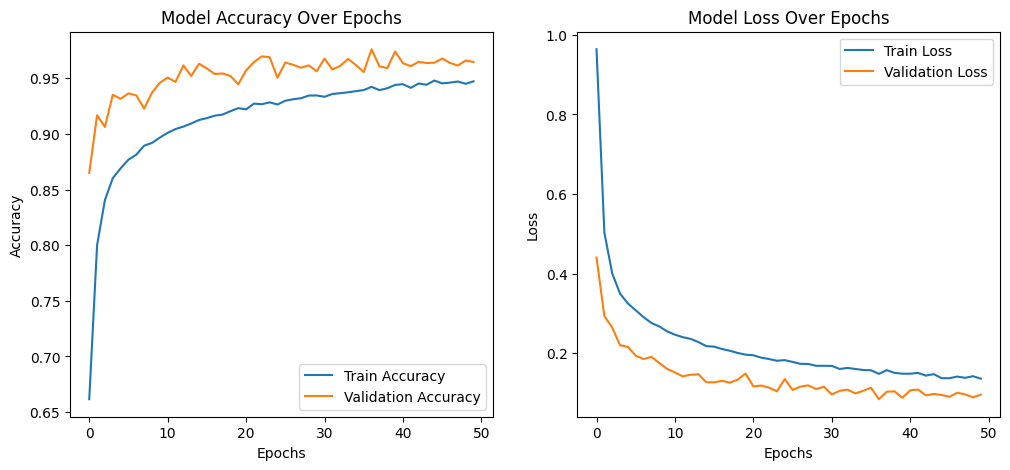

194/194 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99      2701
           1       0.95      0.96      0.96       914
           2       0.91      0.98      0.94       429
           3       0.90      0.93      0.92       214
           4       0.99      0.73      0.84       100
           5       0.66      0.98      0.79        42
           6       0.50      0.55      0.52        29
           7       1.00      0.74      0.85        77
           8       0.91      1.00      0.95       208
           9       0.98      0.97      0.98       544
          10       0.97      0.99      0.98       942

    accuracy                           0.96      6200
   macro avg       0.89      0.89      0.88      6200
weighted avg       0.97      0.96      0.96      6200



In [16]:
import pandas as pd  # For handling tabular data
import numpy as np  # For numerical computations
import matplotlib.pyplot as plt  # For creating visualizations
import seaborn as sns  # For statistical data visualization
from sklearn.model_selection import train_test_split  # To split data into training and testing sets
from sklearn.preprocessing import StandardScaler  # To normalize feature values
from tensorflow.keras.models import Sequential  # To define the ANN architecture
from tensorflow.keras.layers import Dense, Dropout  # To add layers to the neural network
from tensorflow.keras.optimizers import Adam  # Optimizer for updating weights
from tensorflow.keras.utils import to_categorical  # To convert labels into categorical format

# Load the EEG Dataset
import kagglehub

# Download latest version
path = kagglehub.dataset_download("amananandrai/complete-eeg-dataset")

print("Path to dataset files:", path)

# Rename columns for easy identification (assuming the dataset has no predefined column names)
df.columns = [f'Feature_{i+1}' for i in range(df.shape[1])]

# Separate features (X) and target label (y)
X = df.iloc[:, :-1]  # Select all columns except the last as features
y = df.iloc[:, -1]  # Select the last column as the target variable

# Normalize the features to ensure better training stability
scaler = StandardScaler()  # Initialize the standard scaler
X_scaled = scaler.fit_transform(X)  # Apply normalization to all features

# Convert target labels to categorical format (for multi-class classification)
y_categorical = to_categorical(y)  # Convert labels to one-hot encoding format

# Split the dataset into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_categorical, test_size=0.2, random_state=42)

# Define the structure of the Artificial Neural Network (ANN)
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),  # Input layer with 128 neurons and ReLU activation
    Dropout(0.3),  # Dropout layer to prevent overfitting by randomly turning off neurons during training
    Dense(64, activation='relu'),  # Hidden layer with 64 neurons and ReLU activation
    Dropout(0.3),  # Another dropout layer to improve generalization
    Dense(y_train.shape[1], activation='softmax')  # Output layer with softmax activation for multi-class classification
])

# Compile the ANN Model
model.compile(optimizer=Adam(learning_rate=0.001),  # Adam optimizer for adaptive learning rate
              loss='categorical_crossentropy',  # Loss function for multi-class classification
              metrics=['accuracy'])  # Track accuracy during training

# Train the ANN Model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Evaluate the trained model's performance on the test set
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)  # Compute final loss and accuracy
print(f"Test Accuracy: {accuracy:.2f}")  # Print the test accuracy

# Plot Training & Validation Accuracy and Loss over Epochs
plt.figure(figsize=(12, 5))  # Set figure size

# Plot Accuracy
plt.subplot(1, 2, 1)  # Create subplot for accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')  # Training accuracy
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')  # Validation accuracy
plt.xlabel('Epochs')  # Label for x-axis
plt.ylabel('Accuracy')  # Label for y-axis
plt.title('Model Accuracy Over Epochs')  # Title for accuracy plot
plt.legend()  # Add legend

# Plot Loss
plt.subplot(1, 2, 2)  # Create subplot for loss
plt.plot(history.history['loss'], label='Train Loss')  # Training loss
plt.plot(history.history['val_loss'], label='Validation Loss')  # Validation loss
plt.xlabel('Epochs')  # Label for x-axis
plt.ylabel('Loss')  # Label for y-axis
plt.title('Model Loss Over Epochs')  # Title for loss plot
plt.legend()  # Add legend

plt.show()  # Display the plots

# Make Predictions on the test set
y_pred = model.predict(X_test)  # Predict probability distributions for each class
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probabilities into class labels
y_true = np.argmax(y_test, axis=1)  # Convert one-hot encoded labels back to original labels

# Display the classification report to analyze model performance
from sklearn.metrics import classification_report
print("Classification Report:")
print(classification_report(y_true, y_pred_classes))  # Print classification metrics
